<h3> 1. Loading Data</h3>

In [439]:
import pandas as pd
import numpy as np
filename1="C:\\Users\\aitma\\Desktop\\tp1 HDFS\\train.csv"
filename2="C:\\Users\\aitma\\Desktop\\tp1 HDFS\\test.csv"
df=pd.read_csv(filename1)
df_test=pd.read_csv(filename2)

1. Train Data


In [440]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Test Data

In [441]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [442]:
#check if there is a null value in train Dataset
null_col=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 

LotFrontage = 259
Alley = 1369
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [443]:
#check if there is a null value in test Dataset
null_col_test=[]
for i in df_test.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        
        null_col_test.append(i)
        print("{} = {}".format(i,a))
print(null_col_test) 

LotFrontage = 259
Alley = 1369
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


<h1>2. Cleaning Data</h1>

|1. Drop the features which have more then 75% null values

In [444]:
#drop columns that contain more than 1000 values null

droped_col_df=[]
droped_col_test=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a>1000):
        droped_col_df.append(i)
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a>1000):
        droped_col_test.append(i)
        

In [445]:
df=df.drop(droped_col_df,axis=1)
df_test=df_test.drop(droped_col_test,axis=1)

- check if there is another columns with more than 75% null value

In [446]:
droped_col_df=[]
droped_col_test=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a>1000):
        droped_col_df.append(i)
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a>1000):
        droped_col_test.append(i)

In [447]:
droped_col_test

[]

In [448]:
droped_col_df

[]

the features which have more then 75% null values are droped

2.  replace null values in numeric columns by the mean 

---------------------Train Data------------------------------------

In [449]:
df_number_train= df.select_dtypes(include='number')
for i in df_number_train.columns:
    df[i].replace([np.nan], df[i].mean(), inplace=True)
          

null_col2=[]


for i in df_number_train.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
      

print("the number of null values is :",len(null_col2))

the number of null values is : 0


--------------------Test Data----------------------------

In [450]:
df_number_test= df_test.select_dtypes(include='number')
for i in df_number_test.columns:
    df_test[i].replace([np.nan], df_test[i].mean(), inplace=True)
          

null_col2=[]


for i in df_number_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
      

print("the number of null values is  :",len(null_col2))

the number of null values is  : 0


3.   replace null values in Object columns by the most frequence Object in each feature 

---------------------------Train Data ------------------------------

In [451]:
for i in df.select_dtypes(include='object'):
    a=df[i].isna().sum()
    print("{} = {}".format(i,a))

MSZoning = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
KitchenQual = 0
Functional = 0
FireplaceQu = 690
GarageType = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PavedDrive = 0
SaleType = 0
SaleCondition = 0


In [452]:
#replace null values in Object columns by the most frequence Object in each feature 
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

# to check if there is  a null value again
null_col_str2=[]
for i in df.select_dtypes(include='object'):
    a=df[i].isna().sum()
    if(a!=0):
        null_col_str2.append(i)
        print("{} = {}".format(i,a))
print("the number of null values in Object features is :",len(null_col_str2)) 

the number of null values in Object features is : 0


--------------------Test Data-------------------------------------

In [453]:
for i in df_test.select_dtypes(include='object'):
    a=df_test[i].isna().sum()
    print("{} = {}".format(i,a))

MSZoning = 4
Street = 0
LotShape = 0
LandContour = 0
Utilities = 2
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 16
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinType2 = 42
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
KitchenQual = 1
Functional = 2
FireplaceQu = 730
GarageType = 76
GarageFinish = 78
GarageQual = 78
GarageCond = 78
PavedDrive = 0
SaleType = 1
SaleCondition = 0


In [454]:

#replace null values in Object columns by the most frequence Object in each feature 
df_test = df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# to check if there is  a null value again
null_col_str2=[]
for i in df_test.select_dtypes(include='object'):
    a=df_test[i].isna().sum()
    if(a!=0):
        null_col_str2.append(i)
        print("{} = {}".format(i,a))
print("the number of null values in Object features is :",len(null_col_str2)) 

the number of null values in Object features is : 0


In [455]:
# Drop irrelevant continuous variable
df.drop(["Id"], axis=1, inplace=True)
df_test.drop(["Id"], axis=1, inplace=True)

In [456]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [457]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [458]:
continuous_features=df.select_dtypes(include='number')
# df[continuous_features.columns].info()
df[continuous_features.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.000000,0.00,1474.0


2.   Remove Outlires

In [459]:
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std 
        if np.abs(z_score)>3:
            outliers.append(y)
    print("\nOutlier caps for {}:".format(feature))
    print("  -95p: %.1f / %s values exceed that" % (data.quantile(.95),len([i for i in data if i>data.quantile(.95)])))
    print("  -3sd: %.1f / %s values exceed that" % (mean+3*(std),len(outliers)))
    print("  -99p: %.1f / %s values exceed that" % (data.quantile(.99),len([i for i in data if i>data.quantile(.99)])))

In [210]:
for i in continuous_features.columns:
    detect_outlier(i)


Outlier caps for MSSubClass:
  -95p: 160.0 / 40 values exceed that
  -3sd: 183.8 / 30 values exceed that
  -99p: 190.0 / 0 values exceed that

Outlier caps for LotFrontage:
  -95p: 104.0 / 72 values exceed that
  -3sd: 136.1 / 16 values exceed that
  -99p: 137.4 / 15 values exceed that

Outlier caps for LotArea:
  -95p: 17401.2 / 73 values exceed that
  -3sd: 40450.4 / 13 values exceed that
  -99p: 37567.6 / 15 values exceed that

Outlier caps for OverallQual:
  -95p: 8.0 / 61 values exceed that
  -3sd: 10.2 / 2 values exceed that
  -99p: 10.0 / 0 values exceed that

Outlier caps for OverallCond:
  -95p: 8.0 / 22 values exceed that
  -3sd: 8.9 / 28 values exceed that
  -99p: 9.0 / 0 values exceed that

Outlier caps for YearBuilt:
  -95p: 2007.0 / 42 values exceed that
  -3sd: 2061.8 / 6 values exceed that
  -99p: 2009.0 / 1 values exceed that

Outlier caps for YearRemodAdd:
  -95p: 2007.0 / 69 values exceed that
  -3sd: 2046.8 / 0 values exceed that
  -99p: 2009.0 / 6 values exceed th

-  numpy.clip() function is used to Clip (limit) the values in an array.
- I replace outlires values by the value at the 99 th quantile.

In [460]:
df["LotFrontage"].clip(upper=df["LotFrontage"].quantile(.99), inplace=True)
df["LotArea"].clip(upper=df["LotArea"].quantile(.99), inplace=True)
df["MasVnrArea"].clip(upper=df["MasVnrArea"].quantile(.99), inplace=True)
df["BsmtFinSF1"].clip(upper=df["BsmtFinSF1"].quantile(.99), inplace=True)
df["BsmtFinSF2"].clip(upper=df["BsmtFinSF2"].quantile(.99), inplace=True)
df["BsmtUnfSF"].clip(upper=df["BsmtUnfSF"].quantile(.99), inplace=True)
df["TotalBsmtSF"].clip(upper=df["TotalBsmtSF"].quantile(.99), inplace=True)
df["1stFlrSF"].clip(upper=df["1stFlrSF"].quantile(.99), inplace=True)
df["2ndFlrSF"].clip(upper=df["2ndFlrSF"].quantile(.99), inplace=True)
df["LowQualFinSF"].clip(upper=df["LowQualFinSF"].quantile(.99), inplace=True)
df["GrLivArea"].clip(upper=df["GrLivArea"].quantile(.99), inplace=True)
df["GarageArea"].clip(upper=df["GarageArea"].quantile(.99), inplace=True)
df["WoodDeckSF"].clip(upper=df["WoodDeckSF"].quantile(.99), inplace=True)
df["OpenPorchSF"].clip(upper=df["OpenPorchSF"].quantile(.99), inplace=True)
df["EnclosedPorch"].clip(upper=df["EnclosedPorch"].quantile(.99), inplace=True)
df["3SsnPorch"].clip(upper=df["3SsnPorch"].quantile(.99), inplace=True)
df["ScreenPorch"].clip(upper=df["ScreenPorch"].quantile(.99), inplace=True)
df["PoolArea"].clip(upper=df["PoolArea"].quantile(.99), inplace=True)
df["MiscVal"].clip(upper=df["MiscVal"].quantile(.99), inplace=True)

In [461]:
continuous_features=df.select_dtypes(include='number')
# df[continuous_features.columns].info()
df[continuous_features.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.00
LotFrontage,1460.0,69.645952,19.581087,21.0,60.00,70.049958,79.00,137.41
LotArea,1460.0,10062.113425,5063.798824,1300.0,7553.50,9478.500000,11601.50,37567.64
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.00
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.00
MasVnrArea,1460.0,101.181974,167.558414,0.0,0.00,0.000000,164.25,791.28
BsmtFinSF1,1460.0,438.530240,429.049203,0.0,0.00,383.500000,712.25,1572.41
BsmtFinSF2,1460.0,44.404589,148.265347,0.0,0.00,0.000000,0.00,830.38


3.   Calculating Correlation between Numeric Features 


In [462]:
df_number_train= df.select_dtypes(include='number')
inde_var=df_number_train.columns[:-1]
liste_corr=[]
for i in inde_var:
    liste_corr.append(np.corrcoef(df[i],df["SalePrice"]))
liste_corr2=[]
for i in liste_corr:
    if( i[0][0]!=1):
         liste_corr2.append(i[0][0])
    else:
         liste_corr2.append(i[0][1])
len(liste_corr2)  

df_corr=pd.DataFrame()

df_corr["Variables"]=inde_var
df_corr["Correlation With SalePrice"]=liste_corr2

df_corr

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Variables,Correlation With SalePrice
0,MSSubClass,-0.084284
1,LotFrontage,0.360524
2,LotArea,1.000000
3,OverallQual,0.790982
4,OverallCond,1.000000
5,YearBuilt,0.522897
6,YearRemodAdd,0.507101
7,MasVnrArea,0.475506
8,BsmtFinSF1,1.000000
9,BsmtFinSF2,-0.022059


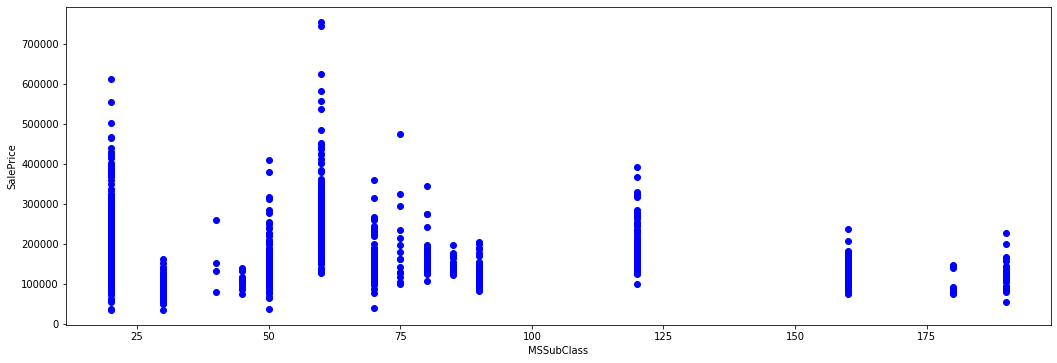

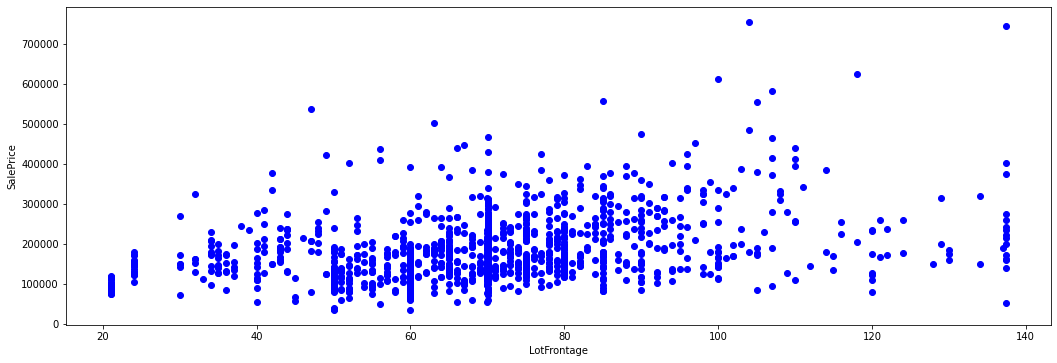

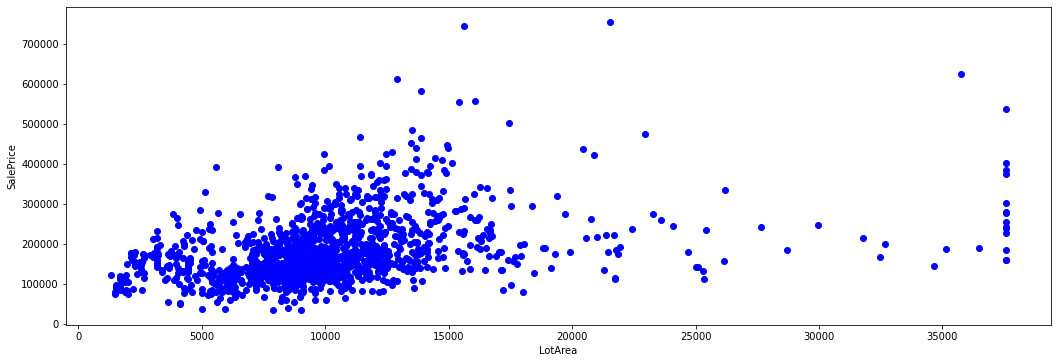

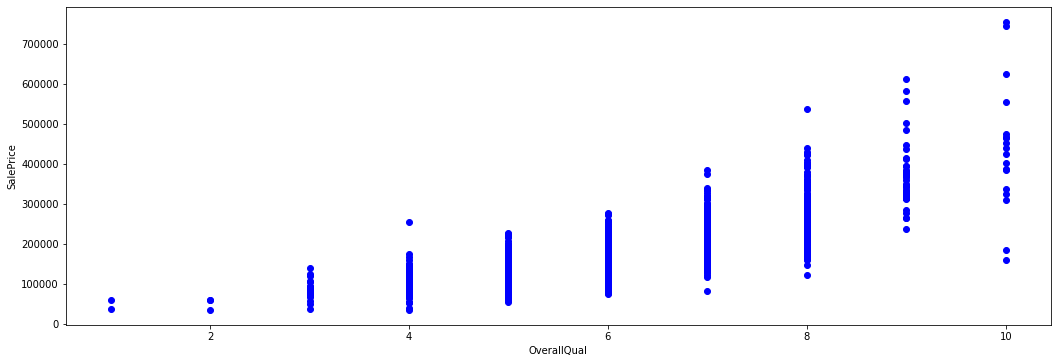

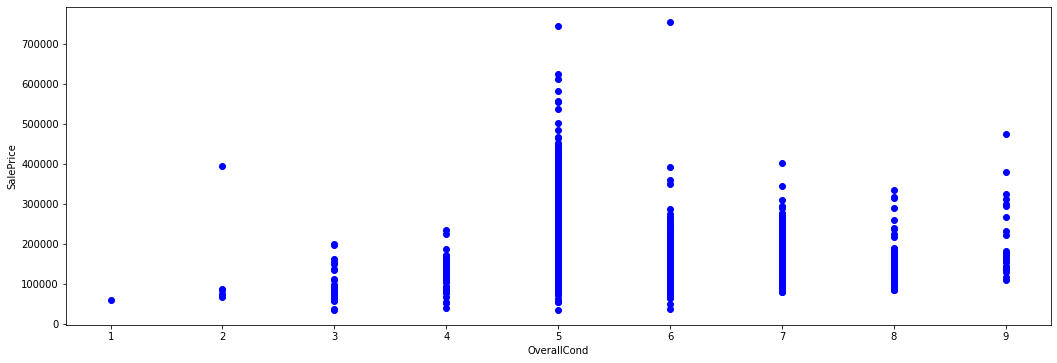

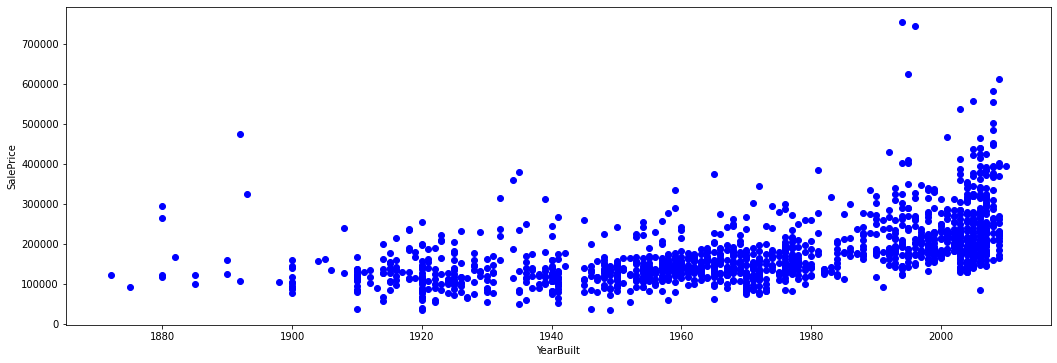

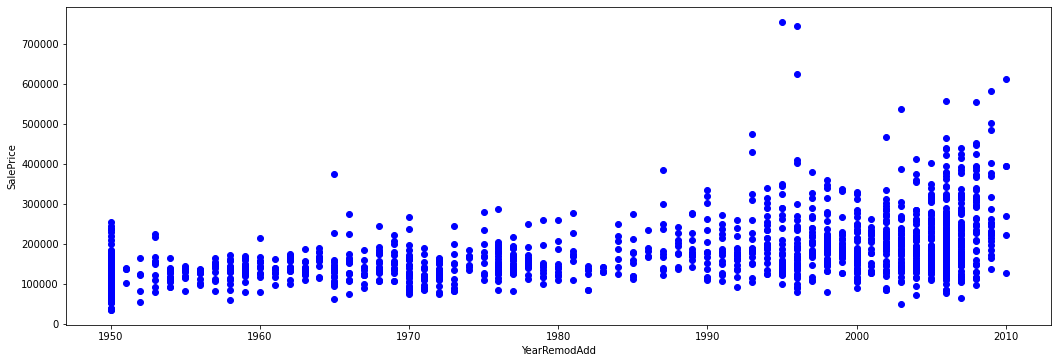

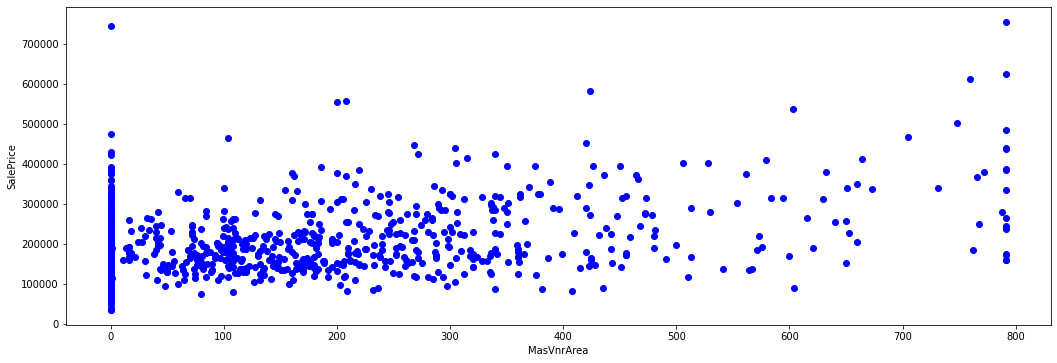

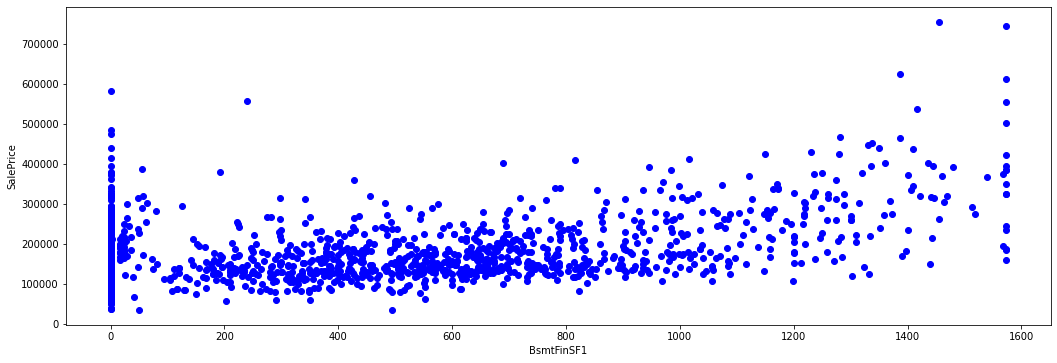

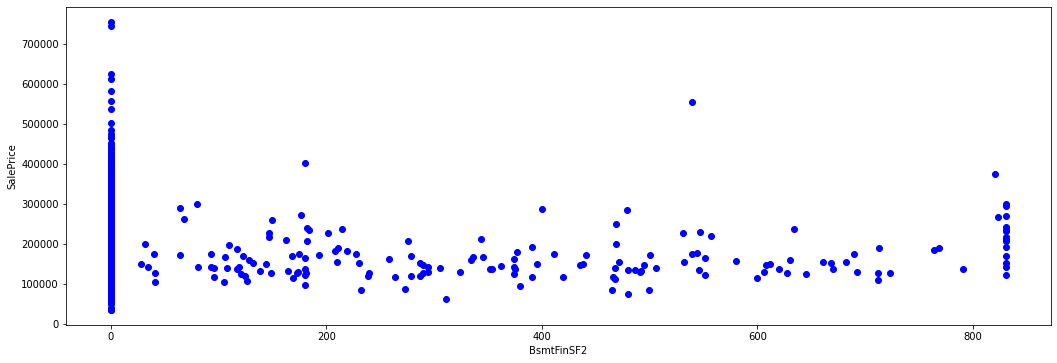

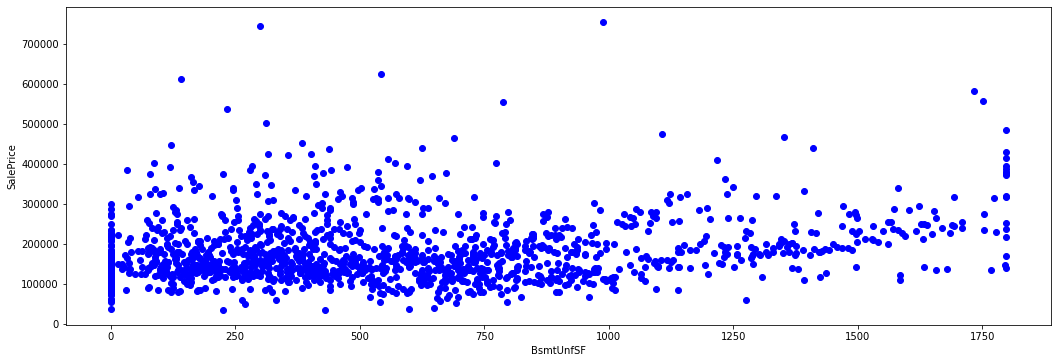

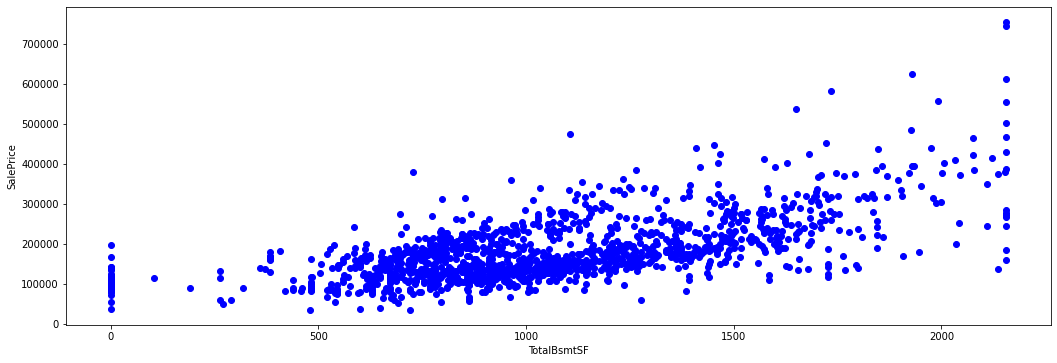

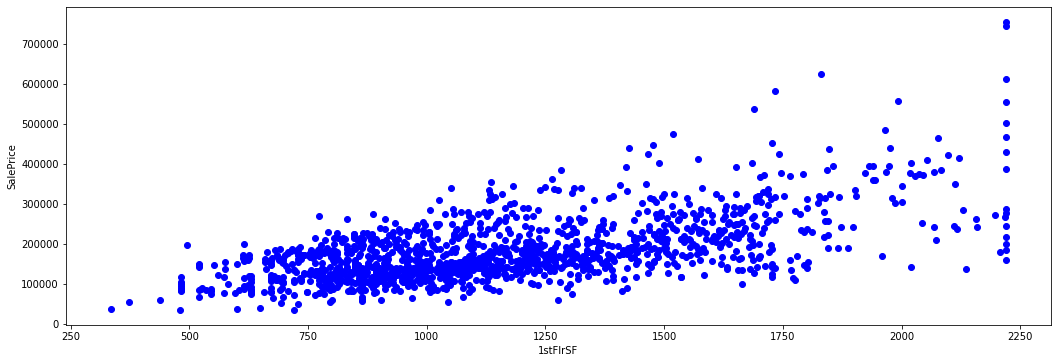

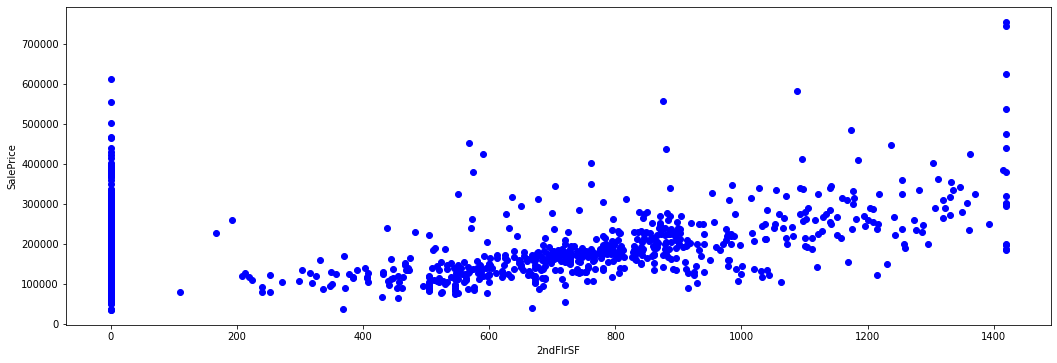

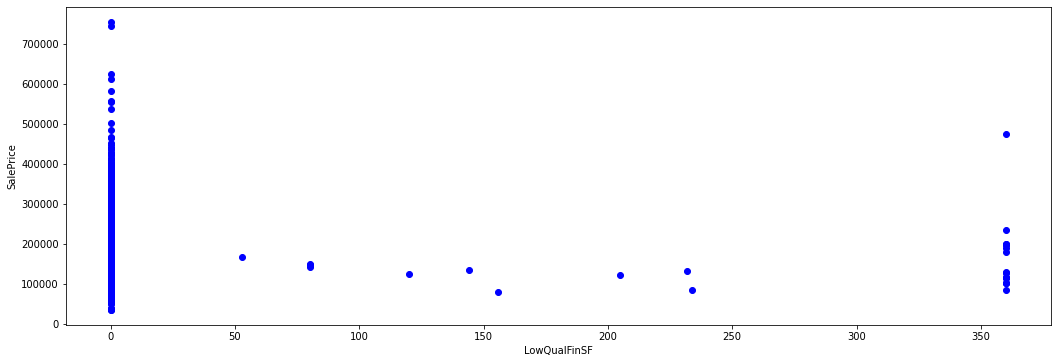

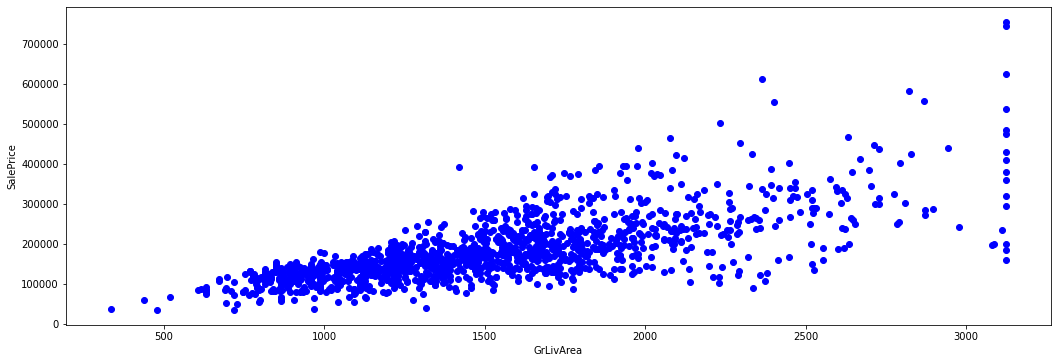

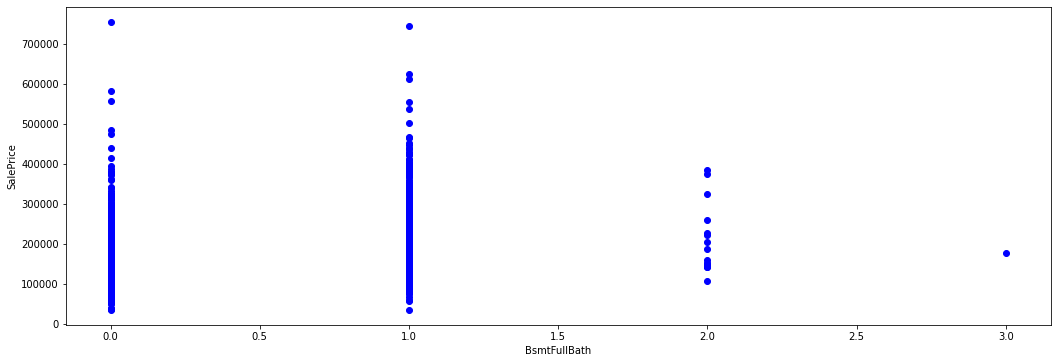

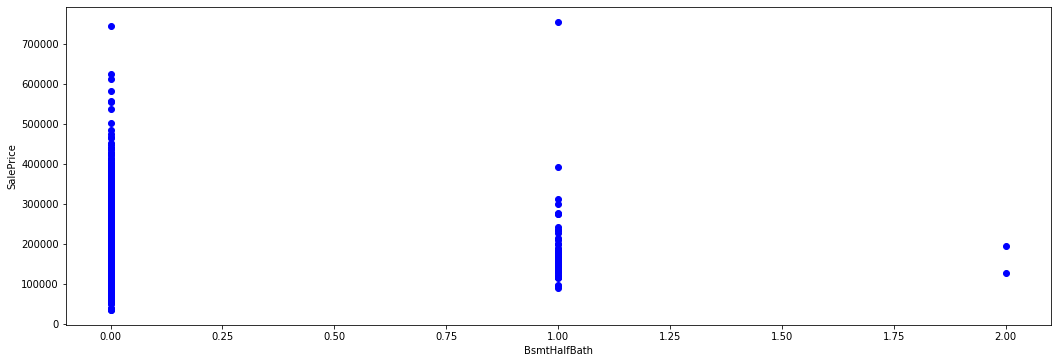

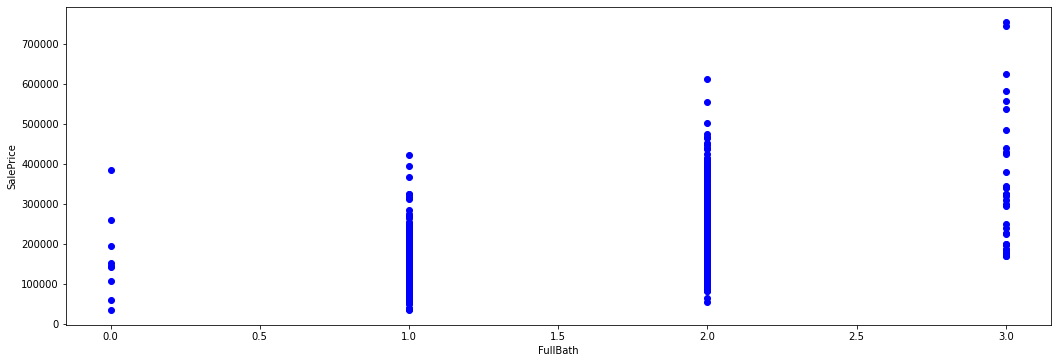

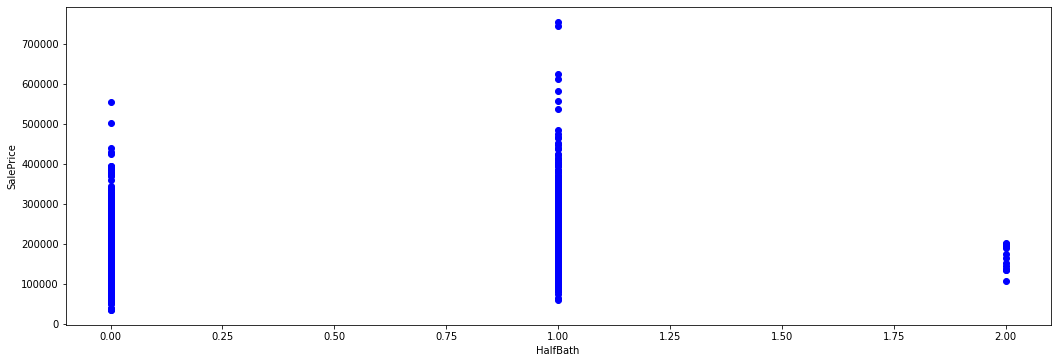

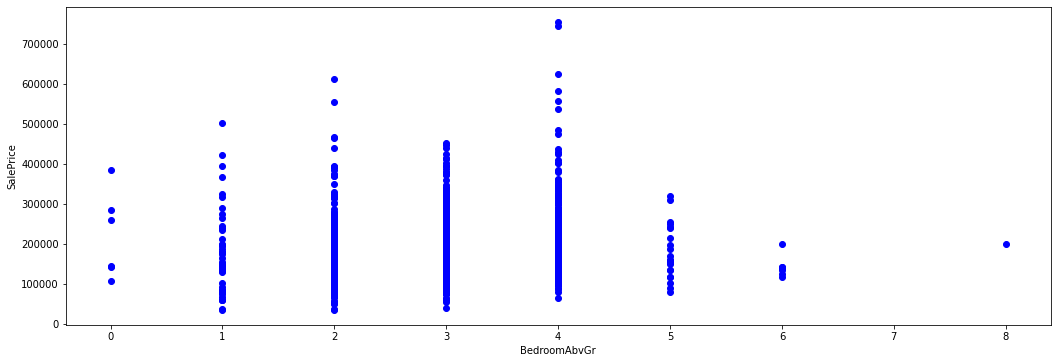

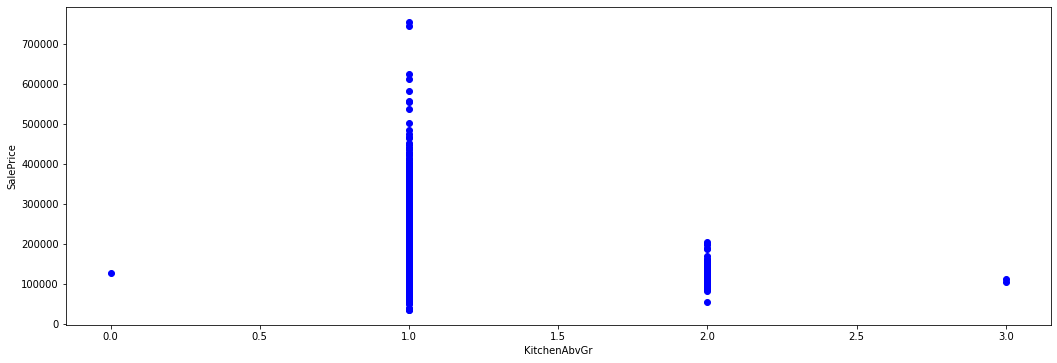

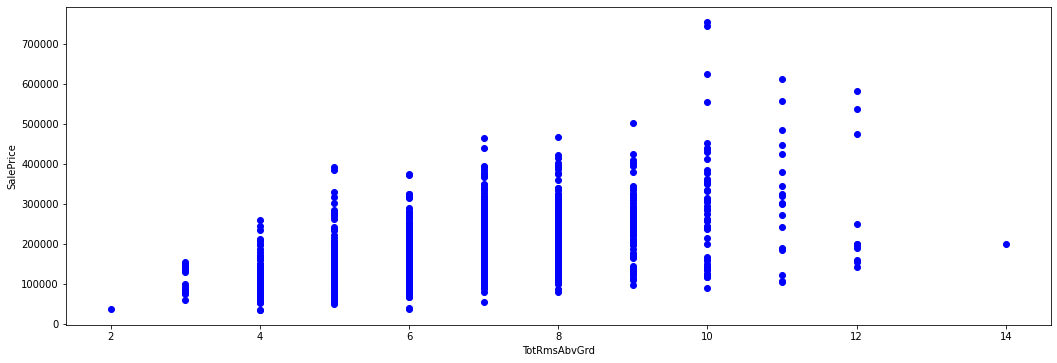

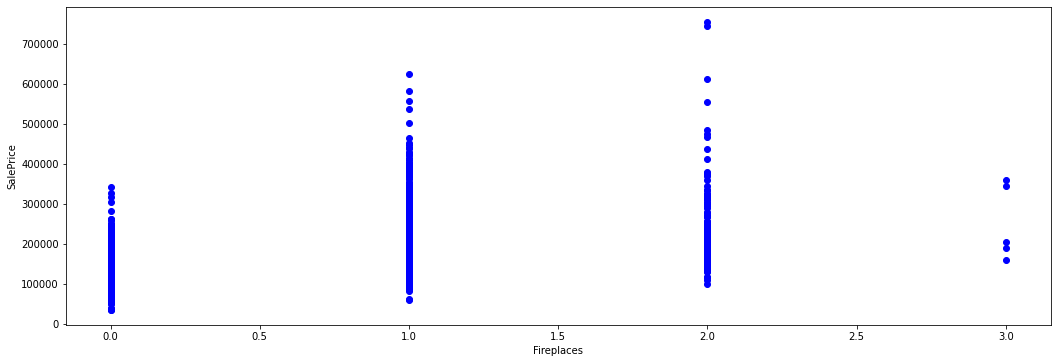

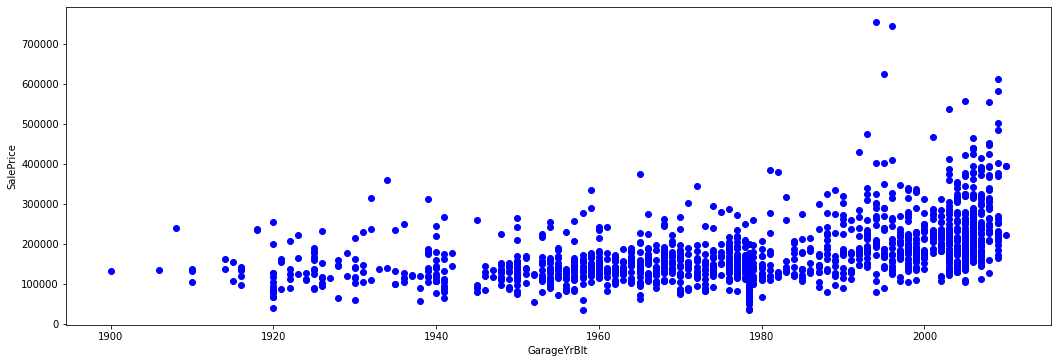

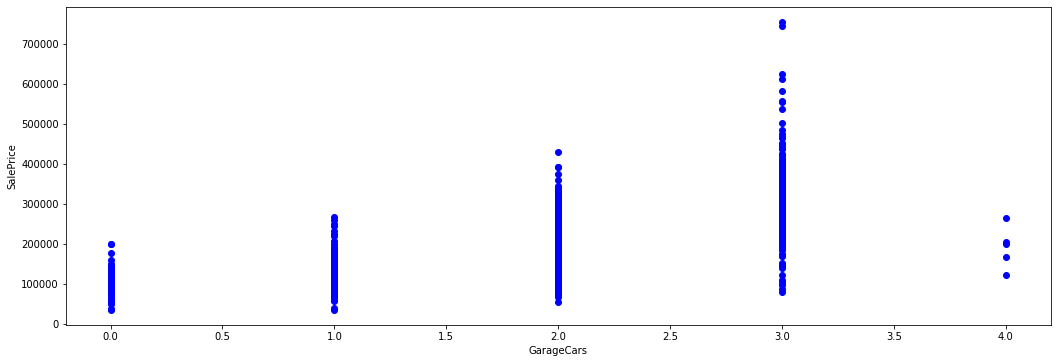

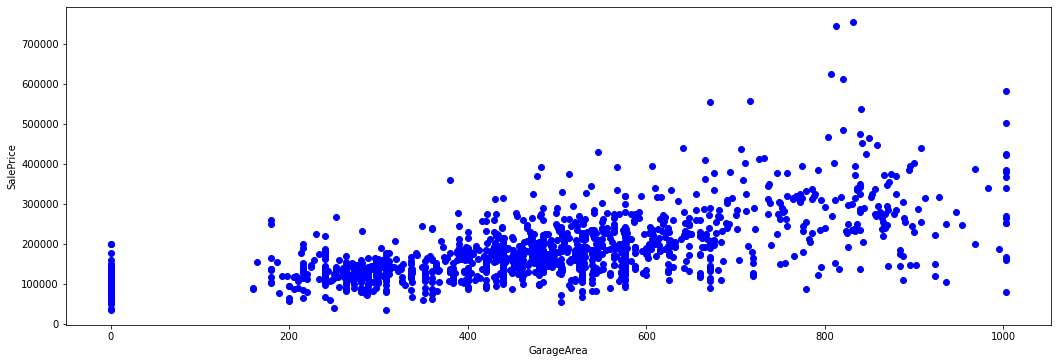

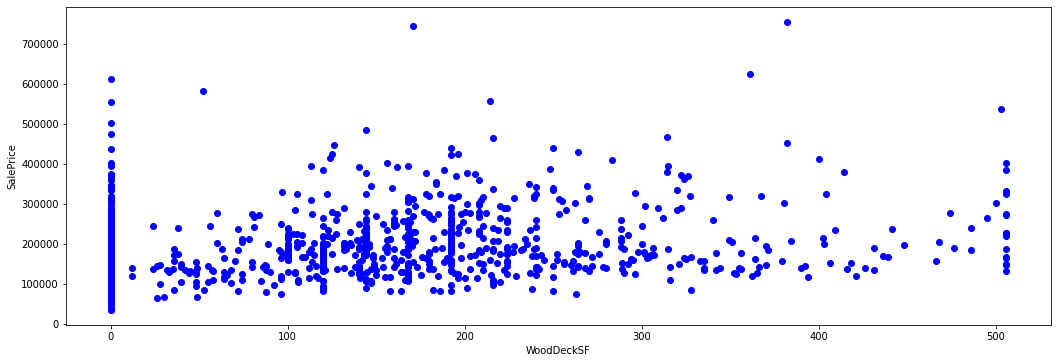

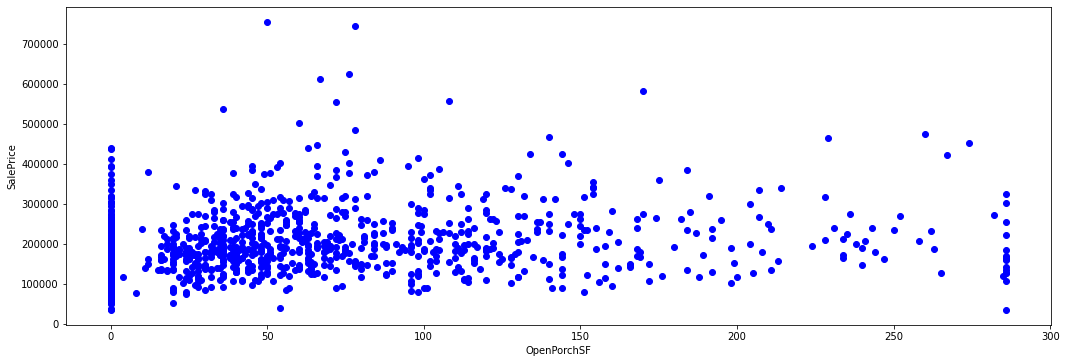

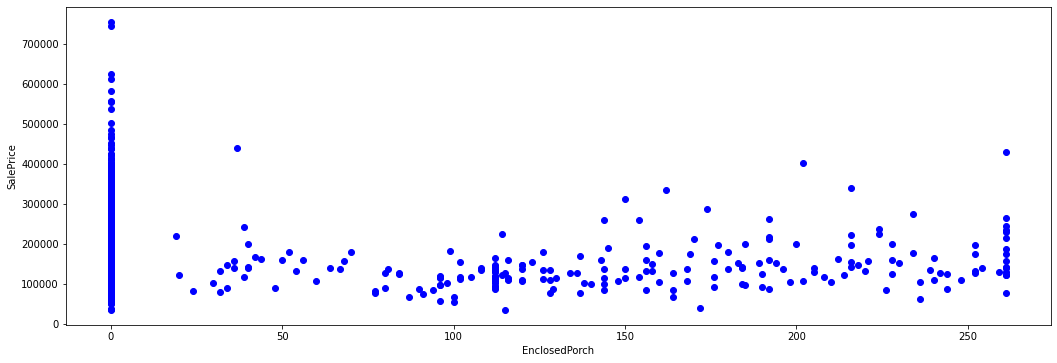

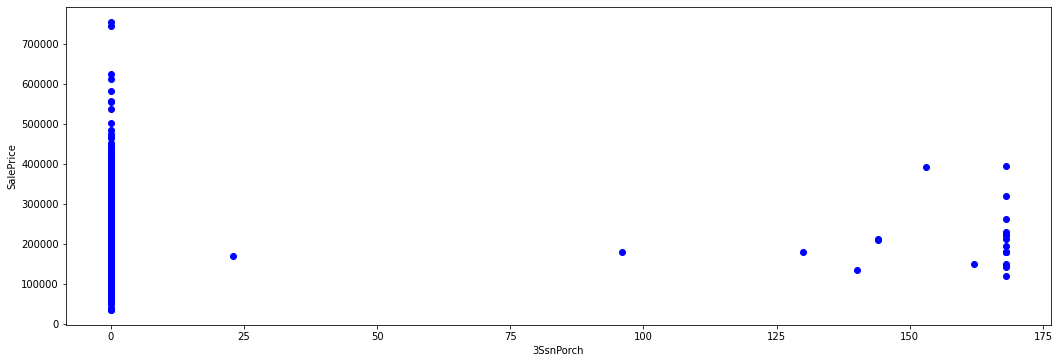

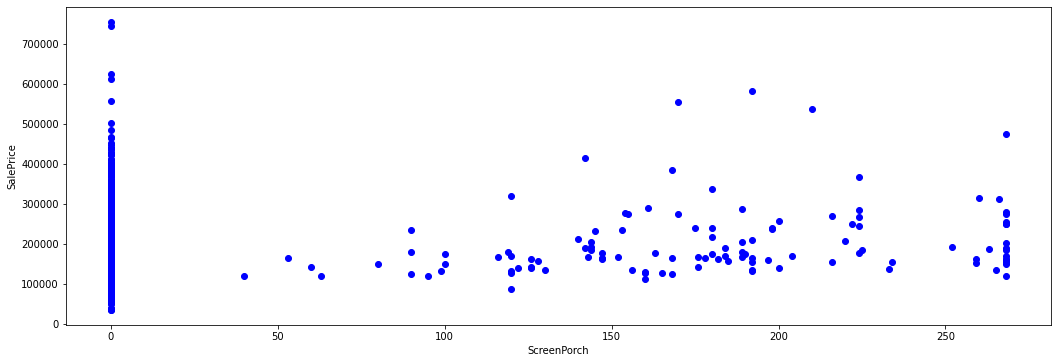

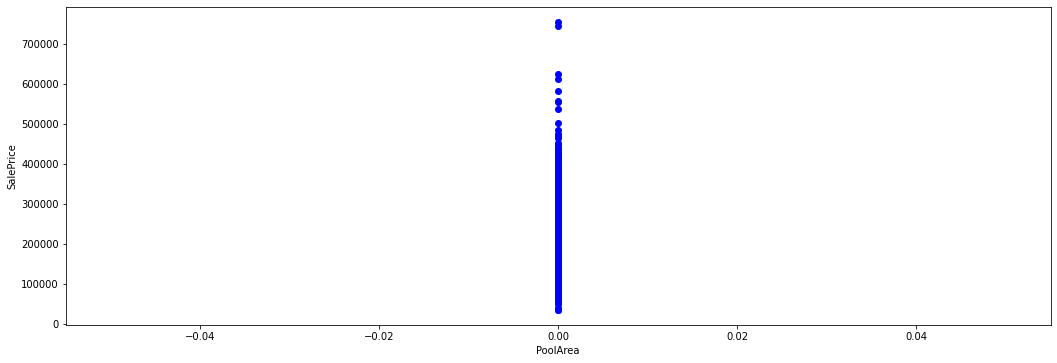

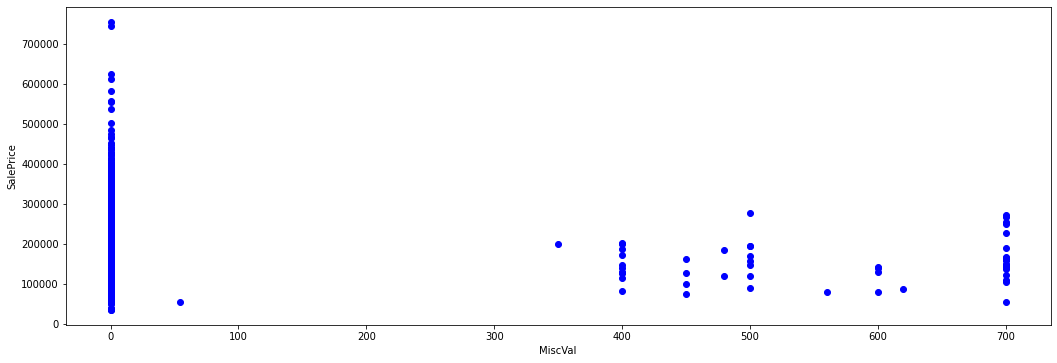

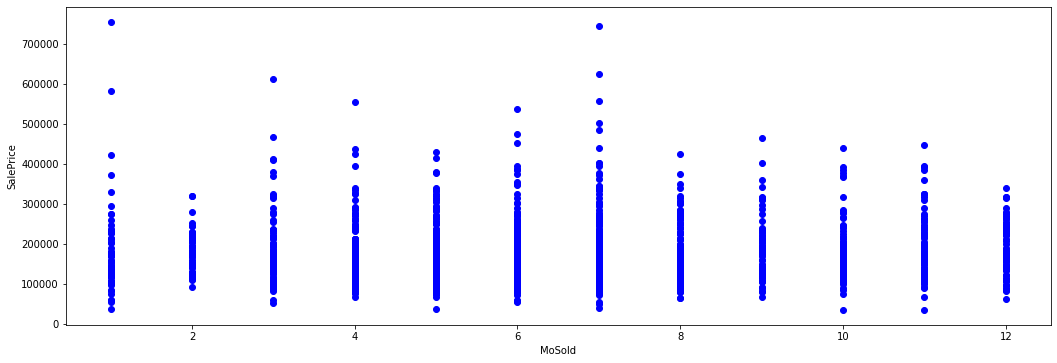

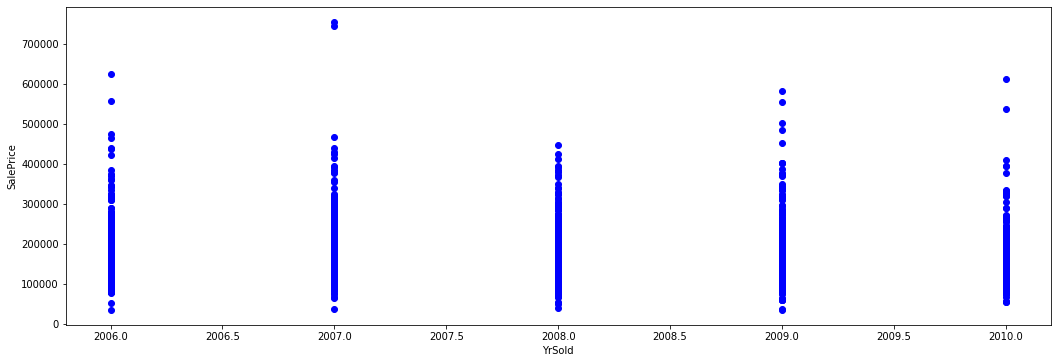

In [59]:
import matplotlib.pyplot as plt
index=1

for i in inde_var:
    plt.figure(figsize=(60, 90))
    plt.subplot(13,3,index)
    
    plt.scatter(df[i], df["SalePrice"], c ="blue")
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

- through those plots we retrieve the variables that are correlated with the SalePrice varibale

In [463]:
 corr_continuous_variables=["LotArea","BsmtFinSF1","BsmtUnfSF","BedroomAbvGr","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","FullBath",
                "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea",]

4.  Encoding Categorical Features

-----------Train Data---------------------------

In [464]:
categorical_features= df.select_dtypes(include='object')
for i in categorical_features:
    print(df[i].unique())

for i in categorical_features:
    value=df[i].unique()
    df[i].replace(value,range(len(value))
                        , inplace=True)

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [465]:
for i in categorical_features:
    print(df[i].unique())

[0 1 2 3 4]
[0 1]
[0 1 2 3]
[0 1 2 3]
[0 1]
[0 1 2 3 4]
[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2 3 4 5 6]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]


5.  Calculating Correlation between each object columns and SalePrice column

In [466]:
frame1=pd.DataFrame()
for i in categorical_features:
    frame1[i]=df[i]
frame1['SalePrice']=df['SalePrice']   
X=frame1.loc[:, frame1.columns != 'SalePrice']
X.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,2,0,2,0,0,...,0,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0


<h4>What is mutual information regression?</h4>


Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [467]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,frame1['SalePrice'])
mutual_info

array([0.11807126, 0.        , 0.10180617, 0.0225454 , 0.        ,
       0.0268805 , 0.        , 0.1354769 , 0.01537825, 0.        ,
       0.02632824, 0.04226939, 0.01793487, 0.00999317, 0.00054521,
       0.07040827, 0.08758901, 0.32638705, 0.02183982, 0.20886475,
       0.32090416, 0.02166728, 0.        , 0.0998471 , 0.01067191,
       0.01988602, 0.16517678, 0.06947243, 0.05633405, 0.33299603,
       0.        , 0.06585079, 0.13277492, 0.25199522, 0.01428671,
       0.01484451, 0.04081864, 0.0746404 , 0.08369126])

In [468]:
#convert list to a pandas serie
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns

In [469]:
mutual_info

MSZoning         0.118071
Street           0.000000
LotShape         0.101806
LandContour      0.022545
Utilities        0.000000
LotConfig        0.026880
LandSlope        0.000000
Neighborhood     0.135477
Condition1       0.015378
Condition2       0.000000
BldgType         0.026328
HouseStyle       0.042269
RoofStyle        0.017935
RoofMatl         0.009993
Exterior1st      0.000545
Exterior2nd      0.070408
MasVnrType       0.087589
ExterQual        0.326387
ExterCond        0.021840
Foundation       0.208865
BsmtQual         0.320904
BsmtCond         0.021667
BsmtExposure     0.000000
BsmtFinType1     0.099847
BsmtFinType2     0.010672
Heating          0.019886
HeatingQC        0.165177
CentralAir       0.069472
Electrical       0.056334
KitchenQual      0.332996
Functional       0.000000
FireplaceQu      0.065851
GarageType       0.132775
GarageFinish     0.251995
GarageQual       0.014287
GarageCond       0.014845
PavedDrive       0.040819
SaleType         0.074640
SaleConditio

In [470]:
from sklearn.feature_selection import SelectPercentile
#I take the features of the highest 15 percent of dataframe mutual_info 
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=15)
selected_top_columns.fit(X, frame1['SalePrice'])
the_corr_Object=X.columns[selected_top_columns.get_support()]


so the most correlated features that we take are:

In [471]:
the_corr_Object

Index(['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'GarageFinish'],
      dtype='object')

so the perfect DataFrame to get a Best Predicted Model of SalePrice is :


-----------------------Train Data----------------------------------------

In [472]:
var_correlated=[]
for i in  corr_continuous_variables:
    var_correlated.append(i)
for i in the_corr_Object:
    var_correlated.append(i)
df=df[var_correlated] 

In [473]:
df['SalePrice']=frame1["SalePrice"]
df.head()

,LotArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtHalfBath,...,Fireplaces,GarageCars,GarageArea,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish,SalePrice
0,8450.0,706.0,150.0,3,7,856.0,856.0,854.0,1710.0,0,...,0,2,548.0,0,0,0,0,0,0,208500
1,9600.0,978.0,284.0,3,6,1262.0,1262.0,0.0,1262.0,1,...,1,2,460.0,1,1,0,0,1,0,181500
2,11250.0,486.0,434.0,3,7,920.0,920.0,866.0,1786.0,0,...,1,2,608.0,0,0,0,0,0,0,223500
3,9550.0,216.0,540.0,3,7,756.0,961.0,756.0,1717.0,0,...,1,3,642.0,1,2,1,1,0,1,140000
4,14260.0,655.0,490.0,4,8,1145.0,1145.0,1053.0,2198.0,0,...,1,3,836.0,0,0,0,0,0,0,250000


---------------------Test Data-------------------------------

In [474]:
df_test=df_test[var_correlated]
df_test

,LotArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtHalfBath,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish
0,11622,468.0,270.0,2,5,882.0,896,0,896,0.0,...,5,0,1.0,730.0,TA,CBlock,TA,TA,TA,Unf
1,14267,923.0,406.0,3,6,1329.0,1329,0,1329,0.0,...,6,0,1.0,312.0,TA,CBlock,TA,TA,Gd,Unf
2,13830,791.0,137.0,3,5,928.0,928,701,1629,0.0,...,6,1,2.0,482.0,TA,PConc,Gd,Gd,TA,Fin
3,9978,602.0,324.0,3,6,926.0,926,678,1604,0.0,...,7,1,2.0,470.0,TA,PConc,TA,Ex,Gd,Fin
4,5005,263.0,1017.0,2,8,1280.0,1280,0,1280,0.0,...,5,0,2.0,506.0,Gd,PConc,Gd,Ex,Gd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,0.0,546.0,3,4,546.0,546,546,1092,0.0,...,5,0,0.0,0.0,TA,CBlock,TA,Gd,TA,Unf
1455,1894,252.0,294.0,3,4,546.0,546,546,1092,0.0,...,6,0,1.0,286.0,TA,CBlock,TA,TA,TA,Unf
1456,20000,1224.0,0.0,4,5,1224.0,1224,0,1224,0.0,...,7,1,2.0,576.0,TA,CBlock,TA,Ex,TA,Unf
1457,10441,337.0,575.0,3,5,912.0,970,0,970,1.0,...,6,0,0.0,0.0,TA,PConc,Gd,TA,TA,Unf


6.  Encoding Categorical Features for Test Data

In [475]:
categorical_features = df_test.select_dtypes(include='object')
for i in categorical_features:
    print(df_test[i].unique())

for i in categorical_features:
    value=df_test[i].unique()
    df_test[i].replace(value,range(len(value))
                        , inplace=True)

['TA' 'Gd' 'Ex' 'Fa']
['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
['TA' 'Gd' 'Ex' 'Fa']
['TA' 'Gd' 'Ex' 'Fa' 'Po']
['TA' 'Gd' 'Ex' 'Fa']
['Unf' 'Fin' 'RFn']


In [476]:
for i in categorical_features:
    print(df[i].unique())

[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2]


In [477]:
df_test.head()

,LotArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtHalfBath,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish
0,11622,468.0,270.0,2,5,882.0,896,0,896,0.0,...,5,0,1.0,730.0,0,0,0,0,0,0
1,14267,923.0,406.0,3,6,1329.0,1329,0,1329,0.0,...,6,0,1.0,312.0,0,0,0,0,1,0
2,13830,791.0,137.0,3,5,928.0,928,701,1629,0.0,...,6,1,2.0,482.0,0,1,1,1,0,1
3,9978,602.0,324.0,3,6,926.0,926,678,1604,0.0,...,7,1,2.0,470.0,0,1,0,2,1,1
4,5005,263.0,1017.0,2,8,1280.0,1280,0,1280,0.0,...,5,0,2.0,506.0,1,1,1,2,1,2


7.   creating a function that calculating a some metrics to evaluate our Model

In [478]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df.iloc[:,:-1], 
                                                              df['SalePrice'], 
                                                              test_size=0.2, 
                                                              random_state=42)

In [479]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly2.fit_transform(X_train_temp)

poly_model = LinearRegression().fit(X_poly,y_train_temp)


In [480]:
X_poly = poly2.fit_transform(X_test)
poly_pred = poly_model.predict(X_poly)

In [481]:
print(r2_score(y_test,poly_pred))
print(mean_squared_error(y_test,poly_pred))
print(mean_absolute_error(y_test,poly_pred))

0.6685878175758637
2542039548.228933
25471.917964023676


In [482]:
X_poly = poly2.fit_transform(df_test)
poly_pred = poly_model.predict(X_poly)
df_test["SalePrice"]=poly_pred

df_test

,LotArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtHalfBath,...,Fireplaces,GarageCars,GarageArea,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish,SalePrice
0,11622,468.0,270.0,2,5,882.0,896,0,896,0.0,...,0,1.0,730.0,0,0,0,0,0,0,171680.735163
1,14267,923.0,406.0,3,6,1329.0,1329,0,1329,0.0,...,0,1.0,312.0,0,0,0,0,1,0,183832.599569
2,13830,791.0,137.0,3,5,928.0,928,701,1629,0.0,...,1,2.0,482.0,0,1,1,1,0,1,182553.209752
3,9978,602.0,324.0,3,6,926.0,926,678,1604,0.0,...,1,2.0,470.0,0,1,0,2,1,1,192771.739846
4,5005,263.0,1017.0,2,8,1280.0,1280,0,1280,0.0,...,0,2.0,506.0,1,1,1,2,1,2,168073.435814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,0.0,546.0,3,4,546.0,546,546,1092,0.0,...,0,0.0,0.0,0,0,0,1,0,0,116833.573663
1455,1894,252.0,294.0,3,4,546.0,546,546,1092,0.0,...,0,1.0,286.0,0,0,0,0,0,0,121494.408767
1456,20000,1224.0,0.0,4,5,1224.0,1224,0,1224,0.0,...,1,2.0,576.0,0,0,0,2,0,0,211969.570876
1457,10441,337.0,575.0,3,5,912.0,970,0,970,1.0,...,0,0.0,0.0,0,1,1,0,0,0,106117.133956


In [483]:
filename2="C:\\Users\\aitma\\Downloads\\home-data-for-ml-course\\test.csv"
df_test1=pd.read_csv(filename2)

In [484]:
submission_test=pd.DataFrame()

In [485]:
submission_test["Id"]=df_test1["Id"]
submission_test["SalePrice"]=df_test["SalePrice"]
submission_test

,Id,SalePrice
0,1461,171680.735163
1,1462,183832.599569
2,1463,182553.209752
3,1464,192771.739846
4,1465,168073.435814
...,...,...
1454,2915,116833.573663
1455,2916,121494.408767
1456,2917,211969.570876
1457,2918,106117.133956


In [486]:
submission_test.to_csv('C:\\Users\\aitma\\Desktop\\submission_Houses_Adv.csv',index=False)